<a href="https://colab.research.google.com/github/munnurumahesh03-coder/machine-learning-for-classification/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

---



In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
weather_data = pd.read_csv('australia.csv')

In [4]:
weather_data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       12/1/2008   Albury     13.4     22.9       0.6          NaN       NaN   
1       12/2/2008   Albury      7.4     25.1       0.0          NaN       NaN   
2       12/3/2008   Albury     12.9     25.7       0.0          NaN       NaN   
3       12/4/2008   Albury      9.2     28.0       0.0          NaN       NaN   
4       12/5/2008   Albury     17.5     32.3       1.0          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
145455  6/21/2017    Uluru      2.8     23.4       0.0          NaN       NaN   
145456  6/22/2017    Uluru      3.6     25.3       0.0          NaN       NaN   
145457  6/23/2017    Uluru      5.4     26.9       0.0          NaN       NaN   
145458  6/24/2017    Uluru      7.8     27.0       0.0          NaN       NaN   
145459  6/25/2017    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0                W           44.0          W  ...        71.0         22.0   
1              WNW           44.0        NNW  ...        44.0         25.0   
2              WSW           46.0          W  ...        38.0         30.0   
3               NE           24.0         SE  ...        45.0         16.0   
4                W           41.0        ENE  ...        82.0         33.0   
...            ...            ...        ...  ...         ...          ...   
145455           E           31.0         SE  ...        51.0         24.0   
145456         NNW           22.0         SE  ...        56.0         21.0   
145457           N           37.0         SE  ...        53.0         24.0   
145458          SE           28.0        SSE  ...        51.0         24.0   
145459         NaN            NaN        ESE  ...        62.0         36.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
145455       1024.6       1020.3       NaN       NaN     10.1     22.4   
145456       1023.5       1019.1       NaN       NaN     10.9     24.5   
145457       1021.0       1016.8       NaN       NaN     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   
145459       1020.2       1017.9       8.0       8.0     15.0     20.9   

        RainToday  RainTomorrow  
0              No            No  
1              No            No  
2              No            No  
3              No            No  
4              No            No  
...           ...           ...  
145455         No            No  
145456         No            No  
145457         No            No  
145458         No            No  
145459         No           NaN  

[145460 rows x 23 columns]

# **Exploratory Data Analysis**

---



In [5]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
weather_data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [7]:
weather_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
print(f"Original number of rows: {len(weather_data)}")
weather_data.dropna(subset=['RainTomorrow'], inplace=True)
print(f"Number of rows after dropping missing target values: {len(weather_data)}")

Original number of rows: 145460
Number of rows after dropping missing target values: 142193


In [9]:
print("\nDistribution of 'RainTomorrow':")
print(weather_data['RainTomorrow'].value_counts(normalize=True))


Distribution of 'RainTomorrow':
RainTomorrow
No     0.775819
Yes    0.224181
Name: proportion, dtype: float64


In [10]:
print("\nConverting target variable to numerical format (0 for 'No', 1 for 'Yes')...")
weather_data['RainTomorrow'] = weather_data['RainTomorrow'].map({'No': 0, 'Yes': 1})
print("Conversion complete.")
print("First 5 values of the transformed 'RainTomorrow' column:")
print(weather_data['RainTomorrow'].head())


Converting target variable to numerical format (0 for 'No', 1 for 'Yes')...
Conversion complete.
First 5 values of the transformed 'RainTomorrow' column:
0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64


In [11]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

In [12]:
weather_data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm   RainTomorrow  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       0.224181  
std        2.887016      2.720633       6.492838       6.937594       0.417043  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.000000  
max        9.000000      9.000000      40.200000      46.700000       1.000000

# **Visualization**

---



In [15]:
fig = px.histogram(
    data_frame=weather_data,
    x='RainTomorrow',
    title='Distribution of Target Variable: RainTomorrow',
    labels={'RainTomorrow': 'Will it Rain Tomorrow?'},
    color='RainTomorrow',
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig.update_layout(
    yaxis_title='Count',
    bargap=0.2
)

fig.show()

In [16]:
import plotly.express as px

fig = px.histogram(
    weather_data,
    x='Rainfall',
    title='Distribution of Rainfall (Log Scale)',
    log_y=True, # This is the key parameter for the log scale
    labels={'Rainfall': 'Rainfall (mm)'}
)
fig.update_layout(yaxis_title='Frequency (Log Scale)')
fig.show()

In [17]:
px.histogram(weather_data,x='Location',color='RainToday',title='Location vs Raintoday')

In [18]:
import plotly.express as px

fig = px.histogram(
    weather_data,
    x='MaxTemp',
    marginal='box', # Adds a box plot on top to show quartiles and outliers
    title='Distribution of Maximum Temperature',
    labels={'MaxTemp': 'Maximum Temperature (°C)'}
)
fig.update_layout(yaxis_title='Frequency')
fig.show()

In [19]:
import plotly.express as px

fig = px.box(
    weather_data,
    x='RainTomorrow',
    y='Humidity3pm',
    color='RainTomorrow', # Colors the boxes by category
    title='Humidity at 3pm vs. Rain Tomorrow',
    labels={'RainTomorrow': 'Did it Rain Tomorrow?', 'Humidity3pm': 'Humidity at 3pm (%)'}
)
fig.show()


In [25]:
fig = px.box(
    data_frame=weather_data,
    x='RainTomorrow',
    y='Sunshine',
    color='RainTomorrow',
    title='Hours of Sunshine vs. Rain Tomorrow',
    labels={
        'RainTomorrow': 'Did it Rain Tomorrow?',
        'Sunshine': 'Sunshine (Hours)'
    },
    # You can choose a color palette similar to 'plasma' if you like
    color_discrete_sequence=px.colors.qualitative.Vivid
)

# Show the interactive figure
fig.show()

Text(0.5, 1.0, 'Correlation Heatmap of All Numerical Features')

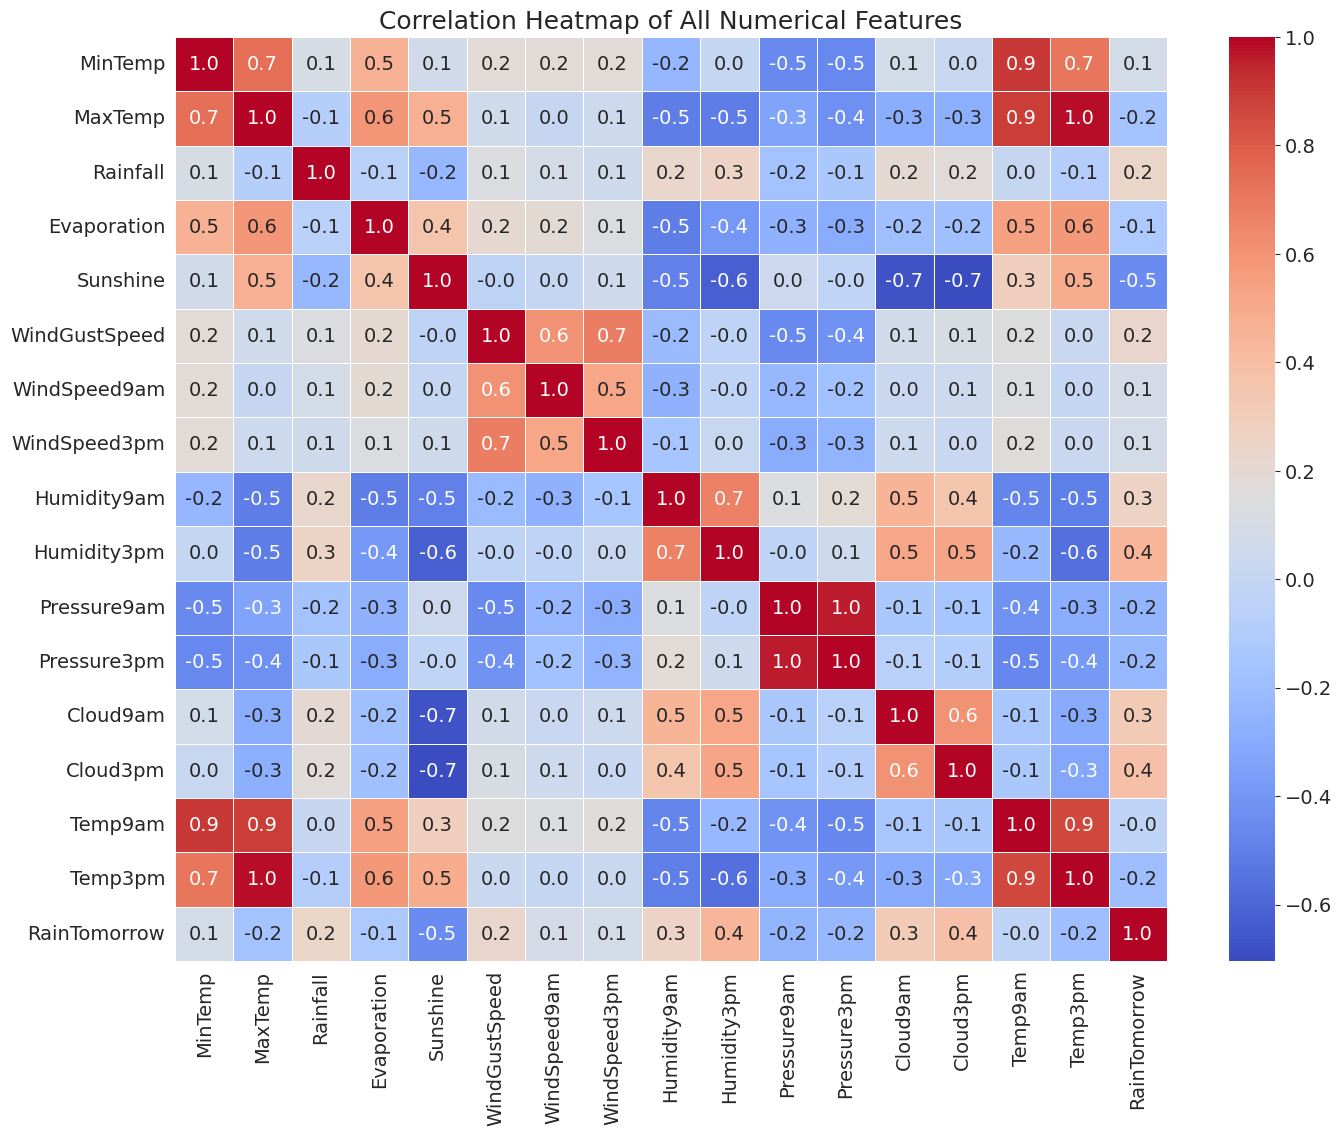

In [ ]:
plt.figure(figsize=(16, 12)) # Create a new, separate figure for the large heatmap
correlation_matrix = weather_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Correlation Heatmap of All Numerical Features', fontsize=18)

# **Feature Engineering**

---



In [ ]:
# --- Make a copy to avoid changing the original raw data ---
df_eng = weather_data.copy()

# --- 1. Date-Based Features ---
# First, ensure the 'Date' column is in datetime format
df_eng['Date'] = pd.to_datetime(df_eng['Date'])

# Extract year, month, and day
df_eng['Year'] = df_eng['Date'].dt.year
df_eng['Month'] = df_eng['Date'].dt.month
df_eng['Day'] = df_eng['Date'].dt.day

# It's often useful to know the day of the year as well
df_eng['DayOfYear'] = df_eng['Date'].dt.dayofyear

print("Created date-based features: Year, Month, Day, DayOfYear")

Created date-based features: Year, Month, Day, DayOfYear


In [ ]:
# Daily temperature range
df_eng['TempRange'] = df_eng['MaxTemp'] - df_eng['MinTemp']

# Average temperature for the day
df_eng['AvgTemp'] = (df_eng['MinTemp'] + df_eng['MaxTemp']) / 2

print("Created temperature-based features: TempRange, AvgTemp")

Created temperature-based features: TempRange, AvgTemp


In [ ]:
df_eng['PressureChange'] = df_eng['Pressure3pm'] - df_eng['Pressure9am']

print("Created pressure-based feature: PressureChange")

Created pressure-based feature: PressureChange


In [ ]:
df_eng['AvgWindSpeed'] = (df_eng['WindSpeed9am'] + df_eng['WindSpeed3pm']) / 2

print("Created wind-based feature: AvgWindSpeed")

Created wind-based feature: AvgWindSpeed


In [ ]:
df_eng['HumidityTemp_Interaction'] = df_eng['AvgTemp'] * (df_eng['Humidity3pm'] * 0.01)

print("Created interaction feature: HumidityTemp_Interaction")

Created interaction feature: HumidityTemp_Interaction


In [ ]:
df_eng = df_eng.drop('Date', axis=1)
print("\nDropped the original 'Date' column.")


Dropped the original 'Date' column.


In [ ]:
# --- Display the results ---
print("\n--- DataFrame with New Features (first 5 rows) ---")
display(df_eng.head())

print(f"\nOriginal number of columns: {len(weather_data.columns)}")
print(f"New number of columns: {len(df_eng.columns)}")


--- DataFrame with New Features (first 5 rows) ---


Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday  RainTomorrow  Year  Month  Day  DayOfYear  \
0     16.9     21.8        No             0  2008     12    1        336   
1     17.2     24.3        No             0  2008     12    2        337   
2     21.0     23.2        No             0  2008     12    3        338   
3     18.1     26.5        No             0  2008     12    4        339   
4     17.8     29.7        No             0  2008     12    5        340   

   TempRange  AvgTemp  PressureChange  AvgWindSpeed  HumidityTemp_Interaction  
0        9.5    18.15            -0.6          22.0                    3.9930  
1       17.7    16.25            -2.8          13.0                    4.0625  
2       12.8    19.30             1.1          22.5                    5.7900  
3       18.8    18.60            -4.8          10.0                    2.9760  
4       14.8    24.90            -4.8          13.5                    8.2170


Original number of columns: 23
New number of columns: 31


In [ ]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Location                  142193 non-null  object 
 1   MinTemp                   141556 non-null  float64
 2   MaxTemp                   141871 non-null  float64
 3   Rainfall                  140787 non-null  float64
 4   Evaporation               81350 non-null   float64
 5   Sunshine                  74377 non-null   float64
 6   WindGustDir               132863 non-null  object 
 7   WindGustSpeed             132923 non-null  float64
 8   WindDir9am                132180 non-null  object 
 9   WindDir3pm                138415 non-null  object 
 10  WindSpeed9am              140845 non-null  float64
 11  WindSpeed3pm              139563 non-null  float64
 12  Humidity9am               140419 non-null  float64
 13  Humidity3pm               138583 non-null  float6

In [ ]:
print("\n--- Preparing 'RainToday' Feature ---")
if 'RainToday' in df_eng.columns and df_eng['RainToday'].dtype == 'object':
    df_eng['RainToday'] = df_eng['RainToday'].map({'No': 0, 'Yes': 1})
    print("Converted 'RainToday' to 0s and 1s. It will be treated as CATEGORICAL in the pipeline.")

print("\n--- Final DataFrame Info ---")
df_eng.info()


--- Preparing 'RainToday' Feature ---
Converted 'RainToday' to 0s and 1s. It will be treated as CATEGORICAL in the pipeline.

--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Location                  142193 non-null  object 
 1   MinTemp                   141556 non-null  float64
 2   MaxTemp                   141871 non-null  float64
 3   Rainfall                  140787 non-null  float64
 4   Evaporation               81350 non-null   float64
 5   Sunshine                  74377 non-null   float64
 6   WindGustDir               132863 non-null  object 
 7   WindGustSpeed             132923 non-null  float64
 8   WindDir9am                132180 non-null  object 
 9   WindDir3pm                138415 non-null  object 
 10  WindSpeed9am              140845 non-null  float64
 11  WindS

# **Train Test Split**

---



In [ ]:
# --- Splitting the data based on the 'Year' column ---
train_df = df_eng[df_eng.Year < 2015].copy()
val_df = df_eng[df_eng.Year == 2015].copy()
test_df = df_eng[df_eng.Year > 2015].copy()

# --- Verify the Shapes ---
print("--- DataFrame Shapes after Time-Based Splitting ---")
print("Training DataFrame shape:", train_df.shape)
print("Validation DataFrame shape:", val_df.shape)
print("Test DataFrame shape:", test_df.shape)

--- DataFrame Shapes after Time-Based Splitting ---
Training DataFrame shape: (98988, 31)
Validation DataFrame shape: (17231, 31)
Test DataFrame shape: (25974, 31)


In [ ]:
train_df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0                W           44.0          W        WNW          20.0   
1              WNW           44.0        NNW        WSW           4.0   
2              WSW           46.0          W        WSW          19.0   
3               NE           24.0         SE          E          11.0   
4                W           41.0        ENE         NW           7.0   
...            ...            ...        ...        ...           ...   
144548         SSE           43.0        ESE        SSE          24.0   
144549          NE           31.0        ENE         SW          19.0   
144550         ESE           39.0        ESE        SSE          26.0   
144551         ESE           43.0        ESE        SSW          28.0   
144552         WNW           76.0        ENE        SSW          30.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0               24.0         71.0         22.0       1007.7       1007.1   
1               22.0         44.0         25.0       1010.6       1007.8   
2               26.0         38.0         30.0       1007.6       1008.7   
3                9.0         45.0         16.0       1017.6       1012.8   
4               20.0         82.0         33.0       1010.8       1006.0   
...              ...          ...          ...          ...          ...   
144548          26.0         22.0         13.0       1014.1       1009.8   
144549          20.0         16.0          8.0       1012.6       1007.6   
144550           9.0         15.0          8.0       1011.9       1008.0   
144551          17.0         22.0          9.0       1014.0       1009.2   
144552          13.0         16.0          9.0       1012.1       1006.2   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
0            8.0       NaN     16.9     21.8        0.0             0  2008   
1            NaN       NaN     17.2     24.3        0.0             0  2008   
2            NaN       2.0     21.0     23.2        0.0             0  2008   
3            NaN       NaN     18.1     26.5        0.0             0  2008   
4            7.0       8.0     17.8     29.7        0.0             0  2008   
...          ...       ...      ...      ...        ...           ...   ...   
144548       NaN       NaN     23.7     31.8        0.0             0  2014   
144549       NaN       NaN     28.9     34.8        0.0             0  2014   
144550       NaN       NaN     29.7     35.7        0.0             0  2014   
144551       NaN       NaN     29.8     37.2        0.0             0  2014   
144552       NaN       NaN     30.1     37.4        0.0             0  2014   

        Month  Day  DayOfYear  TempRange  AvgTemp  PressureChange  \
0          12    1        336        9.5    18.15            -0.6   
1          12    2        337       17.7    16.25            -2.8   
2          12    3        338       12.8    19.30             1.1   
3          12    4        339       18.8    18.60            -4.8   
4          12    5        340       14.8    24.90            -4.8   
...       ...

In [ ]:
val_df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2133     Albury     11.4     33.5       0.0          NaN       NaN   
2134     Albury     15.5     39.6       0.0          NaN       NaN   
2135     Albury     17.1     38.3       0.0          NaN       NaN   
2136     Albury     26.0     33.1       0.0          NaN       NaN   
2137     Albury     19.0     35.2       0.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144913    Uluru     20.5     34.7       0.0          NaN       NaN   
144914    Uluru     18.0     36.4       0.0          NaN       NaN   
144915    Uluru     17.5     37.1       0.0          NaN       NaN   
144916    Uluru     20.0     38.9       0.0          NaN       NaN   
144917    Uluru     19.3     37.4       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2133           WSW           30.0        ESE          W           7.0   
2134            NE           56.0        ESE        ESE           9.0   
2135           NNE           48.0         NE          N          20.0   
2136           NNE           41.0        ESE          W           7.0   
2137             E           33.0        SSE         SE           7.0   
...            ...            ...        ...        ...           ...   
144913           E           52.0        ESE          E          35.0   
144914         ESE           54.0          E        ESE          30.0   
144915           E           56.0          E         SE          33.0   
144916           E           59.0          E        SSE          20.0   
144917          SE           56.0        ESE          S          20.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2133            11.0         45.0         14.0       1013.5       1011.0   
2134             9.0         45.0         12.0       1016.0       1012.4   
2135            20.0         35.0         19.0       1017.9       1012.3   
2136             7.0         46.0         37.0       1013.6       1012.1   
2137             9.0         60.0         34.0       1017.4       1014.7   
...              ...          ...          ...          ...          ...   
144913          20.0         23.0         12.0       1013.2       1010.1   
144914          31.0         17.0          7.0       1014.7       1010.9   
144915          22.0         12.0          7.0       1012.6       1007.5   
144916          17.0         12.0         12.0       1007.2       1002.6   
144917          28.0         46.0         18.0       1007.3       1003.7   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
2133         NaN       NaN     21.0     32.7        0.0             0  2015   
2134         NaN       NaN     25.6     38.2        0.0             0  2015   
2135         NaN       NaN     29.2     37.0        0.0             0  2015   
2136         8.0       5.0     27.4     30.9        0.0             0  2015   
2137         8.0       NaN     25.6     32.5        0.0             0  2015   
...          ...       ...      ...      ...        ...           ...   ...   
144913       NaN       NaN     24.3     33.0        0.0             0  2015   
144914       NaN       NaN     26.7     35.0        0.0             0  2015   
144915       NaN       NaN     28.1     34.7        0.0             0  2015   
144916       NaN       1.0     31.3     38.4        0.0             0  2015   
144917       NaN       NaN     25.8     35.8        0.0             0  2015   

        Month  Day  DayOfYear  TempRange  AvgTemp  PressureChange  \
2133        1    1          1       22.1    22.45            -2.5   
2134        1    2          2       24.1    27.55            -3.6   
2135        1    3          3       21.2    27.70            -5.6   
2136        1    4          4        7.1    29.55            -1.5   
2137        1    5          5       16.2    27.10            -2.7   
...       ...

In [ ]:
test_df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury     20.4     37.6       0.0          NaN       NaN   
2499     Albury     20.9     33.6       0.4          NaN       NaN   
2500     Albury     18.4     23.1       2.2          NaN       NaN   
2501     Albury     17.3     23.7      15.6          NaN       NaN   
2502     Albury     15.5     22.9       6.8          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
145454    Uluru      3.5     21.8       0.0          NaN       NaN   
145455    Uluru      2.8     23.4       0.0          NaN       NaN   
145456    Uluru      3.6     25.3       0.0          NaN       NaN   
145457    Uluru      5.4     26.9       0.0          NaN       NaN   
145458    Uluru      7.8     27.0       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE           54.0        NaN        ESE           0.0   
2499           SSE           50.0        SSE         SE           9.0   
2500           ENE           48.0        ESE        ENE          11.0   
2501           SSE           39.0         SE        SSE           9.0   
2502           ENE           31.0         SE        SSE           6.0   
...            ...            ...        ...        ...           ...   
145454           E           31.0        ESE          E          15.0   
145455           E           31.0         SE        ENE          13.0   
145456         NNW           22.0         SE          N          13.0   
145457           N           37.0         SE        WNW           9.0   
145458          SE           28.0        SSE          N          13.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498             7.0         46.0         17.0       1013.4       1009.2   
2499            17.0         54.0         30.0       1011.1       1008.4   
2500            39.0         62.0         67.0       1014.0       1014.8   
2501            17.0         74.0         65.0       1017.9       1016.5   
2502             9.0         92.0         63.0       1016.3       1013.9   
...              ...          ...          ...          ...          ...   
145454          13.0         59.0         27.0       1024.7       1021.2   
145455          11.0         51.0         24.0       1024.6       1020.3   
145456           9.0         56.0         21.0       1023.5       1019.1   
145457           9.0         53.0         24.0       1021.0       1016.8   
145458           7.0         51.0         24.0       1019.4       1016.5   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
2498         7.0       3.0     26.1     36.7        0.0             0  2016   
2499         8.0       8.0     24.8     31.7        0.0             1  2016   
2500         8.0       8.0     21.8     19.5        1.0             1  2016   
2501         8.0       8.0     19.2     21.6        1.0             1  2016   
2502         8.0       8.0     17.2     22.2        1.0             0  2016   
...          ...       ...      ...      ...        ...           ...   ...   
145454       NaN       NaN      9.4     20.9        0.0             0  2017   
145455       NaN       NaN     10.1     22.4        0.0             0  2017   
145456       NaN       NaN     10.9     24.5        0.0             0  2017   
145457       NaN       NaN     12.5     26.1        0.0             0  2017   
145458       3.0       2.0     15.1     26.0        0.0             0  2017   

        Month  Day  DayOfYear  TempRange  AvgTemp  PressureChange  \
2498        1    1          1       17.2    29.00            -4.2   
2499        1    2          2       12.7    27.25            -2.7   
2500        1    3          3        4.7    20.75             0.8   
2501        1    4          4        6.4    20.50            -1.4   
2502        1    5          5        7.4    19.20            -2.4   
...       ...

# **Input and Target Columns**

---



In [ ]:
target_column = 'RainTomorrow'

# Create Training sets
X_train = train_df.drop(target_column, axis=1)
y_train = train_df[target_column]

In [ ]:
# Create Validation sets
X_val = val_df.drop(target_column, axis=1)
y_val = val_df[target_column]

In [ ]:
# Create Test sets
X_test = test_df.drop(target_column, axis=1)
y_test = test_df[target_column]

In [ ]:
# --- Verify the Shapes ---
print("--- Final Dataset Shapes ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print("-" * 30)
print(f"Shape of X_val:   {X_val.shape}")
print(f"Shape of y_val:   {y_val.shape}")
print("-" * 30)
print(f"Shape of X_test:  {X_test.shape}")
print(f"Shape of y_test:  {y_test.shape}")

--- Final Dataset Shapes ---
Shape of X_train: (98988, 30)
Shape of y_train: (98988,)
------------------------------
Shape of X_val:   (17231, 30)
Shape of y_val:   (17231,)
------------------------------
Shape of X_test:  (25974, 30)
Shape of y_test:  (25974,)


# **Pipeline**

---



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# 1. Identify Numerical and Categorical Columns from X_train
# -----------------------------------------------------------
# Note: We explicitly drop 'Year' as it was only for splitting and we don't want it in the model.
numerical_features = X_train.select_dtypes(include=np.number).columns.drop('Year').tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

# The 'RainToday' column is currently a float (0.0/1.0), but it's conceptually categorical.
# Let's move it to the categorical list to be one-hot encoded.
if 'RainToday' in numerical_features:
    numerical_features.remove('RainToday')
    categorical_features.append('RainToday')

print(f"Identified {len(numerical_features)} numerical features for the pipeline.")
print(f"Identified {len(categorical_features)} categorical features for the pipeline.")

# 2. Construct the Preprocessing Pipelines
# ----------------------------------------
# Numerical pipeline: Median imputation + Standard scaling
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: Missing value imputation + One-hot encoding
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent',fill_value='unknown')), # Using most_frequent is a safe bet for categoricals
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])

# 3. Combine Preprocessing Steps with ColumnTransformer
# -----------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop' # Drop any columns not specified (like 'Year')
)

# 4. Create the Full Model Pipeline
# ---------------------------------
# This chains the preprocessor and the classifier together.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42)) # liblinear is good for this dataset size
])

print("\n✅ Preprocessing and full model pipelines created successfully!")

model_pipeline

Identified 24 numerical features for the pipeline.
Identified 5 categorical features for the pipeline.

✅ Preprocessing and full model pipelines created successfully!


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9a...
                                                   'HumidityTemp_Interaction']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am', 'WindDir3pm',
                                                   'RainToday'])])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

# **Evaluation adn Selection**

---



In [ ]:
print("Training the Logistic Regression pipeline...")
model_pipeline.fit(X_train, y_train)
print("✅ Training complete.")

Training the Logistic Regression pipeline...
✅ Training complete.


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report

print("\nMaking predictions on the validation data...")
val_preds = model_pipeline.predict(X_val)
val_preds_proba = model_pipeline.predict_proba(X_val)[:, 1] # Get probabilities for AUC-ROC

print("\n--- Baseline Logistic Regression Evaluation ---")
f1 = f1_score(y_val, val_preds)
roc_auc = roc_auc_score(y_val, val_preds_proba)
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC:  {roc_auc:.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_val, val_preds))



Making predictions on the validation data...

--- Baseline Logistic Regression Evaluation ---
F1-Score: 0.5677
AUC-ROC:  0.8712

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     13583
           1       0.75      0.46      0.57      3648

    accuracy                           0.85     17231
   macro avg       0.81      0.71      0.74     17231
weighted avg       0.84      0.85      0.84     17231



# **Helper Function**

---



In [ ]:
def test_hyperparameter(param_name, param_value):

    params = {param_name: param_value}

    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', random_state=42, **params))
    ])

    # Train the pipeline
    model_pipeline.fit(X_train, y_train)

    train_preds = model_pipeline.predict(X_train)
    train_f1 = f1_score(y_train, train_preds)

    # --- Validation Metrics ---
    val_preds = model_pipeline.predict(X_val)
    val_f1 = f1_score(y_val, val_preds)

    # Return a dictionary with the F1 Error for both sets.
    return {
         param_name: param_value,
        'train_f1_error': round(1 - train_f1, 4),
        'validation_f1_error': round(1 - val_f1, 4)
    }

# **Hyperparameter Tuning**

---



# **Class weight**

---



In [ ]:
class_weight_df = pd.DataFrame(test_hyperparameter('class_weight', w) for w in [None, 'balanced'])

display(class_weight_df)

class_weight  train_f1_error  validation_f1_error
0         None          0.3884               0.4323
1     balanced          0.3676               0.3741

# **C values**

---



In [ ]:
c_df = pd.DataFrame(test_hyperparameter('C', c) for c in [0.001, 0.01, 0.1, 1, 10, 100])

display(c_df)

C  train_f1_error  validation_f1_error
0    0.001          0.4075               0.4588
1    0.010          0.3954               0.4428
2    0.100          0.3896               0.4344
3    1.000          0.3884               0.4323
4   10.000          0.3881               0.4319
5  100.000          0.3880               0.4322

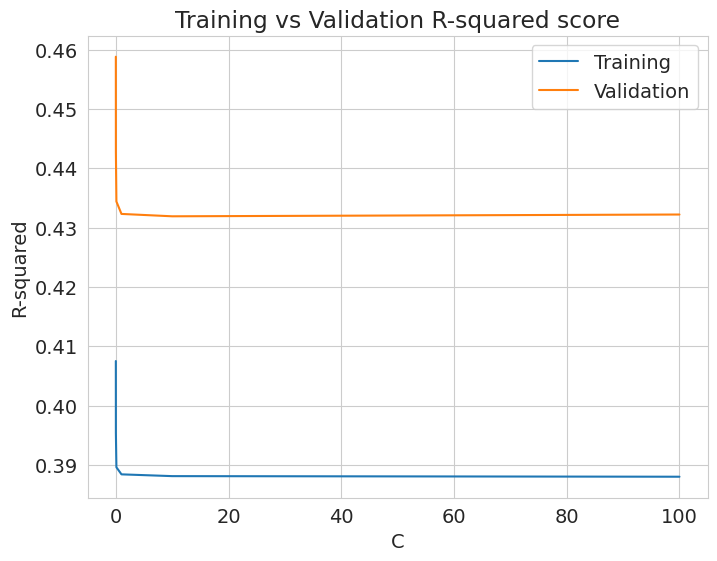

In [ ]:
plt.figure()
plt.plot(c_df['C'],c_df['train_f1_error'])
plt.plot(c_df['C'],c_df['validation_f1_error'])
plt.title('Training vs Validation R-squared score')
plt.xlabel('C')
plt.ylabel('R-squared')
plt.legend(['Training','Validation'])

# **GridSearch CV**

---



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Assume 'preprocessor', 'X_train', and 'y_train' are already defined.

# --- 1. Define the Model Pipeline ---

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# --- 2. Define the Hyperparameter Grid to Search ---

param_grid = {
    'classifier__C': [0.1, 1.0, 10, 100],
    'classifier__class_weight': [None, 'balanced']
}

# --- 3. Set up and Run GridSearchCV ---
print("--- Running GridSearchCV for Logistic Regression ---")

grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# This is the main training and tuning step.
grid_search.fit(X_train, y_train)

# --- 4. Display the Results ---
print("\n✅ GridSearchCV Complete.")
print(f"Best F1-Score found during cross-validation: {grid_search.best_score_:.4f}")
print(f"Best Hyperparameters found: {grid_search.best_params_}")

# You can also view the detailed results for all combinations
cv_results_df = pd.DataFrame(grid_search.cv_results_)
print("\n--- Detailed CV Results (Top 5) ---")
display(cv_results_df[['param_classifier__C', 'param_classifier__class_weight', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score').head())

# The 'grid_search' object itself is now the best version of the model,
# retrained on all the training data, ready for evaluation or saving.
best_lr_model = grid_search.best_estimator_


--- Running GridSearchCV for Logistic Regression ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits

✅ GridSearchCV Complete.
Best F1-Score found during cross-validation: 0.5769
Best Hyperparameters found: {'classifier__C': 0.1, 'classifier__class_weight': None}

--- Detailed CV Results (Top 5) ---


param_classifier__C param_classifier__class_weight  mean_test_score  \
0                  0.1                           None         0.576930   
1                  0.1                       balanced         0.571496   
2                  1.0                           None         0.566070   
4                 10.0                           None         0.558538   
6                100.0                           None         0.558356   

   std_test_score  rank_test_score  
0        0.021108                1  
1        0.022391                2  
2        0.030341                3  
4        0.037546                4  
6        0.037948                5

# **Evaluation**

---



In [ ]:
best_lr_model = grid_search.best_estimator_

print("✅ Best model extracted from GridSearchCV.")
print(f"The best model has parameters: C=0.1 and class_weight=None")

✅ Best model extracted from GridSearchCV.
The best model has parameters: C=0.1 and class_weight=None


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

# --- Step 1: Get the best model from the completed Grid Search ---
best_lr_model = grid_search.best_estimator_
print("✅ Best model extracted from GridSearchCV.")

# --- Step 2: Make predictions on the validation set ---
print("Making predictions on the unseen validation data...")
val_preds = best_lr_model.predict(X_val)
val_preds_proba = best_lr_model.predict_proba(X_val)[:, 1] # Get probabilities for the 'Yes' class for AUC

# --- Step 3: Calculate and print the final scores ---
final_f1_score = f1_score(y_val, val_preds)
final_auc_score = roc_auc_score(y_val, val_preds_proba)

print("\n--- Official Gauntlet Score for Logistic Regression ---")
print(f"Validation F1-Score: {final_f1_score:.4f}")
print(f"Validation AUC-ROC:  {final_auc_score:.4f}")
print("----------------------------------------------------")
print("\nThis is the score to beat for all future models.")

✅ Best model extracted from GridSearchCV.
Making predictions on the unseen validation data...

--- Official Gauntlet Score for Logistic Regression ---
Validation F1-Score: 0.5656
Validation AUC-ROC:  0.8710
----------------------------------------------------

This is the score to beat for all future models.


# **Feature Importance**

---



In [ ]:
best_model = grid_search.best_estimator_

# --- Step 2: Get feature importances from THIS 'best_model' ---

print("\n--- Analyzing Feature Importances of the Best Model ---")
importance_df = pd.DataFrame({
    'Feature': best_model.named_steps['preprocessor'].get_feature_names_out(),
    'Importance': np.abs(best_model.named_steps['classifier'].coef_[0])
}).sort_values('Importance', ascending=False)

display(importance_df.head(10))



--- Analyzing Feature Importances of the Best Model ---


Feature  Importance
9                 num__Humidity3pm    1.272827
46       cat__Location_MountGinini    1.124666
70        cat__Location_Wollongong    0.970807
62        cat__Location_Townsville    0.918699
39         cat__Location_Katherine    0.834970
38            cat__Location_Hobart    0.757975
36            cat__Location_Darwin    0.743959
50     cat__Location_NorfolkIsland    0.702445
5               num__WindGustSpeed    0.698818
42  cat__Location_MelbourneAirport    0.695027

# **Saving through Joblib**

---



In [ ]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

print("--- Training the CORRECTED Model (class_weight='balanced', C=10) ---")

# Let's assume C=10 was the best C value we found when using class_weight='balanced'.
# If another C was better, use that one.
correct_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', C=10))
])

correct_model.fit(X_train, y_train)
print("✅ Corrected model trained successfully.")


# --- Step 2: Save this better model, overwriting the old one ---
model_filename = '01_logistic_regression_tuned.joblib'
joblib.dump(correct_model, model_filename)
print(f"\n✅ Better model has been saved to '{model_filename}'.")
print("The old model file has been overwritten.")


# --- Step 3: Relaunch your Gradio App ---
print("\nNext Action: Please stop your old Gradio script and run 'python app.py' again.")
print("It will now load the new, more reliable model.")

# we have used different hyperparameters than suggested by gridsearch cv because they are overfitting to the cross validation

--- Training the CORRECTED Model (class_weight='balanced', C=10) ---
✅ Corrected model trained successfully.

✅ Better model has been saved to '01_logistic_regression_tuned.joblib'.
The old model file has been overwritten.

Next Action: Please stop your old Gradio script and run 'python app.py' again.
It will now load the new, more reliable model.


# **Deployment**

---



In [ ]:
import gradio as gr
import os

MODEL_FILE_PATH = '01_logistic_regression_tuned.joblib'

if not os.path.exists(MODEL_FILE_PATH):
    print(f"❌ Error: Model file '{MODEL_FILE_PATH}' not found.")
    exit()

try:
    model_pipeline = joblib.load(MODEL_FILE_PATH)
    print("✅ Model pipeline loaded successfully.")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    exit()

AUSTRALIA_LOCATIONS = [
    'Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru'
]
AUSTRALIA_LOCATIONS.sort()

def predict_rain(Location, MinTemp, MaxTemp, Rainfall, WindGustSpeed, Humidity9am, Humidity3pm, Pressure3pm, RainToday):
    input_data = pd.DataFrame({
        'Location': [Location], 'MinTemp': [MinTemp], 'MaxTemp': [MaxTemp],
        'Rainfall': [Rainfall], 'WindGustSpeed': [WindGustSpeed], 'Humidity9am': [Humidity9am],
        'Humidity3pm': [Humidity3pm], 'Pressure3pm': [Pressure3pm], 'RainToday': [RainToday],
        'Evaporation': [np.nan], 'Sunshine': [np.nan], 'WindGustDir': [np.nan],
        'WindDir9am': [np.nan], 'WindDir3pm': [np.nan], 'WindSpeed9am': [np.nan],
        'WindSpeed3pm': [np.nan], 'Pressure9am': [np.nan], 'Cloud9am': [np.nan],
        'Cloud3pm': [np.nan], 'Temp9am': [np.nan], 'Temp3pm': [np.nan],
        'Year': [2024], 'Month': [9], 'Day': [14], 'DayOfYear': [258],
        'TempRange': [MaxTemp - MinTemp if MinTemp and MaxTemp else np.nan],
        'AvgTemp': [(MinTemp + MaxTemp) / 2 if MinTemp and MaxTemp else np.nan],
        'PressureChange': [np.nan], 'AvgWindSpeed': [np.nan], 'HumidityTemp_Interaction': [np.nan]
    })
    prediction_proba = model_pipeline.predict_proba(input_data)[0]
    return {'No Rain': prediction_proba[0], 'Rain': prediction_proba[1]}

inputs = [
    gr.Dropdown(choices=AUSTRALIA_LOCATIONS, label="Location", info="Select the city or location."),
    gr.Number(label="Min Temperature (°C)", info="Today's minimum temperature."),
    gr.Number(label="Max Temperature (°C)", info="Today's maximum temperature."),
    gr.Number(label="Rainfall (mm)", info="Amount of rainfall today."),
    gr.Number(label="Wind Gust Speed (km/h)", info="Speed of the strongest wind gust today."),
    gr.Slider(minimum=0, maximum=100, value=70, label="Humidity at 9am (%)"),
    gr.Slider(minimum=0, maximum=100, value=50, label="Humidity at 3pm (%)"),
    gr.Number(label="Pressure at 3pm (hPa)", info="Atmospheric pressure at 3pm."),
    gr.Radio(choices=['No', 'Yes'], value='No', label="Did it Rain Today?")
]
outputs = gr.Label(label="Prediction: Will it Rain Tomorrow?")

app = gr.Interface(
    fn=predict_rain,
    inputs=inputs,
    outputs=outputs,
    title="Rain in Australia Prediction",
    description="Predict whether it will rain tomorrow in Australia using a tuned Logistic Regression model. Fill in today's weather data to get a prediction.",
    allow_flagging='never'
)

print("🚀 Launching Gradio App...")
app.launch(share=True)


✅ Model pipeline loaded successfully.
🚀 Launching Gradio App...
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ec8fcdc6207ef1c966.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
